# Table of Contents<a id='toc0_'></a>    
- 1. [Central Research Question: **Which factors are most correlated with student performance?**](#toc1_)    
  - 1.1. [Hypothesis 1: **Both study hours and attendance records have a positive correlation with exam performance.**](#toc1_1_)    
  - 1.2. [Hypothesis 2: **Lower motivation levels are associated with lower exam scores, and vice versa, higher motivation levels are positively associated with higher exam scores.**](#toc1_2_)    
  - 1.3. [Hypothesis 3: **High parental involvement and positive peer influence positively impact student performance in exams.**](#toc1_3_)    
- 2. [Data Preparation](#toc2_)    
  - 2.1. [Looking at the Updated DataFrame](#toc2_1_)    
  - 2.2. [Data Dictionary](#toc2_2_)    
  - 2.3. [Linear Regression Functions](#toc2_3_)    
- 3. [Initial Data Visualizations](#toc3_)
- 4. [Findings](#toc4_)    
  - 4.1. [Hypothesis 1](#toc4_1_)    
    - 4.1.1. [Finding 1](#toc4_1_1_)    
  - 4.2. [Hypothesis 2](#toc4_2_)    
    - 4.2.1. [Finding 2](#toc4_2_1_)    
  - 4.3. [Hypothesis 3](#toc4_3_)    
    - 4.3.1. [Finding 3](#toc4_3_1_)    
  - 4.4. [Feature Importances](#toc4_4_)    
    - 4.4.1. [Scaling input variables](#toc4_4_1_)    
    - 4.4.2. [***Random Forest***](#toc4_4_2_)    
    - 4.4.3. [***Permutation***](#toc4_4_3_)    
    - 4.4.4. [***Lasso Regression***](#toc4_4_4_)    
    - 4.4.5. [Findings](#toc4_4_5_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [2]:
%autosave 120

Autosaving every 120 seconds


In [3]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Student Performance Factors

This dataset provides a comprehensive overview of select factors affecting student performance on exams. Each observation is representative of one student's information, including information on her/his attendance, parental involvement, study hours, other aspects influencing her/his academic success, and her/his final exam scores.

A data dictionary will be provided upon cleaning the dataset to more accurately describe our variables of interest. Below is an intitial look at the DataFrame.

In [5]:
# Load the data
df = pd.read_csv("StudentPerformanceFactors.csv")

In [6]:
# Look at the data
df.head()
df.columns
df.shape

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

(6607, 20)

In [7]:
df.shape

(6607, 20)

In [8]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [10]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

## 1. <a id='toc1_'></a>[Central Research Question: **Which factors are most correlated with student performance?**](#toc0_)

### 1.1. <a id='toc1_1_'></a>[Hypothesis 1: **Both study hours and attendance records have a positive correlation with exam performance.**](#toc0_)

### 1.2. <a id='toc1_2_'></a>[Hypothesis 2: **Lower motivation levels are associated with lower exam scores, and vice versa, higher motivation levels are positively associated with higher exam scores.**](#toc0_)

### 1.3. <a id='toc1_3_'></a>[Hypothesis 3: **High parental involvement and positive peer influence positively impact student performance in exams.**](#toc0_)

## 2. <a id='toc2_'></a>[Data Preparation](#toc0_)

In [11]:
# copy original DataFrame to avoid any changes to the original DataFrame 
df2 = df.copy()

In [12]:
# drop unnecessary columns
df2.drop(columns=['Access_to_Resources', 'Previous_Scores', 'Internet_Access', 'Teacher_Quality', 'Parental_Education_Level', 'Tutoring_Sessions', 'School_Type', 'Physical_Activity', 'Learning_Disabilities', 'Distance_from_Home'], axis = 1, inplace = True)

In [13]:
# one hot encoding
columns_to_apply_func = ['Motivation_Level', 'Family_Income', 'Peer_Influence', 'Parental_Involvement']

def f(x):
    if (x == "Low") | (x == "Negative"):
        return 0
    elif (x == 'Medium') | (x == "Neutral"):
        return 0.5
    elif (x == 'High') | (x == "Positive"):
        return 1

for col in columns_to_apply_func:
    df2[col] = df2[col].apply(f)

In [14]:
# label encoding
df2['Gender'] = df2['Gender'].map({'Female': 0, 'Male': 1}) 
df2['Extracurricular_Activities'] = df2['Extracurricular_Activities'].map({'No': 0, 'Yes': 1})

In [15]:
# error checking
df2.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Extracurricular_Activities    0
Sleep_Hours                   0
Motivation_Level              0
Family_Income                 0
Peer_Influence                0
Gender                        0
Exam_Score                    0
dtype: int64

### 2.1. <a id='toc2_1_'></a>[Looking at the Updated DataFrame](#toc0_)

In [16]:
df2.head()

,Hours_Studied,Attendance,Parental_Involvement,Extracurricular_Activities,Sleep_Hours,Motivation_Level,Family_Income,Peer_Influence,Gender,Exam_Score
0,23,84,0.0,0,7,0.0,0.0,1.0,1,67
1,19,64,0.0,0,8,0.0,0.5,0.0,0,61
2,24,98,0.5,1,7,0.5,0.5,0.5,1,74
3,29,89,0.0,1,8,0.5,0.5,0.0,1,71
4,19,92,0.5,1,6,0.5,0.5,0.5,0,70


In [17]:
df2.describe()

,Hours_Studied,Attendance,Parental_Involvement,Extracurricular_Activities,Sleep_Hours,Motivation_Level,Family_Income,Peer_Influence,Gender,Exam_Score
count,6607.000000,6607.000000,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,0.543212,0.596035,7.02906,0.453231,0.393825,0.595429,0.577267,67.235659
std,5.990594,11.547475,0.347761,0.490728,1.46812,0.347899,0.371308,0.377938,0.494031,3.890456
min,1.000000,60.000000,0.000000,0.000000,4.00000,0.000000,0.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,0.500000,0.000000,6.00000,0.000000,0.000000,0.500000,0.000000,65.000000
50%,20.000000,80.000000,0.500000,1.000000,7.00000,0.500000,0.500000,0.500000,1.000000,67.000000
75%,24.000000,90.000000,1.000000,1.000000,8.00000,0.500000,0.500000,1.000000,1.000000,69.000000
max,44.000000,100.000000,1.000000,1.000000,10.00000,1.000000,1.000000,1.000000,1.000000,101.000000


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               6607 non-null   int64  
 1   Attendance                  6607 non-null   int64  
 2   Parental_Involvement        6607 non-null   float64
 3   Extracurricular_Activities  6607 non-null   int64  
 4   Sleep_Hours                 6607 non-null   int64  
 5   Motivation_Level            6607 non-null   float64
 6   Family_Income               6607 non-null   float64
 7   Peer_Influence              6607 non-null   float64
 8   Gender                      6607 non-null   int64  
 9   Exam_Score                  6607 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 516.3 KB


### 2.2. <a id='toc2_2_'></a>[Data Dictionary](#toc0_)
Now that we have cleaned the data, below is a data dictionary describing each of our variables of interest.

In [19]:
description_table = pd.DataFrame({
    "Column Name": df2.columns,
    "Data Type": df2.dtypes.values
})

description_table["Description"] = [
    'Number of hours spent studying per week',
    'A percentage of classes attended',
    'Categorized by 0, 0.5, 1, with 0 being the lowest and 1 being the highest concern levels',
    'Ascribed with 0 or 1 values to indicate whether a student is involved in extracurriculars',
    'How many hours did the student sleep',
    'Categorized by 0, 0.5, 1, with 0 being the lowest and 1 being the highest motivation levels',
    'Categorized by 0, 0.5, 1, with 0 being the lowest and 1 being the highest family income levels',
    'Categorized by 0, 0.5, 1, with 0 being positive and 1 being the negative peer influence representations',
    'Categorized by 0 or 1, with 0 being Female and 1 being the Male',
    'Continuous variable representing the final exam score'
]

description_table

,Column Name,Data Type,Description
0,Hours_Studied,int64,Number of hours spent studying per week
1,Attendance,int64,A percentage of classes attended
2,Parental_Involvement,float64,"Categorized by 0, 0.5, 1, with 0 being the low..."
3,Extracurricular_Activities,int64,Ascribed with 0 or 1 values to indicate whethe...
4,Sleep_Hours,int64,How many hours did the student sleep
5,Motivation_Level,float64,"Categorized by 0, 0.5, 1, with 0 being the low..."
6,Family_Income,float64,"Categorized by 0, 0.5, 1, with 0 being the low..."
7,Peer_Influence,float64,"Categorized by 0, 0.5, 1, with 0 being positiv..."
8,Gender,int64,"Categorized by 0 or 1, with 0 being Female and..."
9,Exam_Score,int64,Continuous variable representing the final exa...


### 2.3. <a id='toc2_3_'></a>[Linear Regression Functions](#toc0_)
Here, we wrote the functions to fit both single and multiple linear regression models.

In [20]:
X = df2[['Hours_Studied', 'Attendance', 'Motivation_Level', 'Parental_Involvement', 'Peer_Influence']]
y = df2['Exam_Score']

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_scaled = sm.add_constant(X_scaled)

#### Single Linear Regression

In [21]:
def single_linear_regression(feature, X, y):
    X_single = sm.add_constant(X[[feature]])
    X_train_single, X_test_single, y_train, y_test = train_test_split(X_single, y, test_size=0.2, random_state=42)
    model_single = sm.OLS(y_train, X_train_single).fit()
    print("Single Linear Regression for", feature)
    print(model_single.summary())
    
    y_pred_single = model_single.predict(X_test_single)
    ss_total = np.sum((y_test - y_test.mean())**2)
    ss_residual = np.sum((y_test - y_pred_single)**2)
    r_squared = 1 - (ss_residual / ss_total)
    print("Test R-squared:", r_squared)
    return model_single

#### Multiple Linear Regression

In [22]:
def multiple_linear_regression(features, X, y):
    X_multi = sm.add_constant(X[features])
    X_train_multi, X_test_multi, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)
    model_multi = sm.OLS(y_train, X_train_multi).fit()
    print("Multiple Linear Regression for", features)
    print(model_multi.summary())
    
    y_pred_multi = model_multi.predict(X_test_multi)
    ss_total = np.sum((y_test - y_test.mean())**2)
    ss_residual = np.sum((y_test - y_pred_multi)**2)
    r_squared = 1 - (ss_residual / ss_total)
    print("Test R-squared:", r_squared)
    return model_multi

## 3. <a id='toc3_'></a>[Initial Data Visualizations](#toc0_)

Checking the correlation between the columns in the DataFrame. 

Important Notes About Correlation Matrices: 
- Correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic tool for checking the results of the analysis.
- The matrix, here, only measures the strength and direction of linear relationships between pairs of variables, but it does not capture non-linear relationships (this includes interactions between multiple variables). 
- Some variables, here, are categorical and some are continuous. The correlation matrix only captures linear relationships between continuous variables. 
- Even if the categorical variables have been encoded as numbers, the correlation matrix will not capture the meanigful relationships between them.

In [23]:
correlation_matrix = df2.corr()

# Style the correlation matrix
corr = correlation_matrix.style.background_gradient(cmap="coolwarm").format("{:.2f}")

from IPython.display import display
display(corr)

,Hours_Studied,Attendance,Parental_Involvement,Extracurricular_Activities,Sleep_Hours,Motivation_Level,Family_Income,Peer_Influence,Gender,Exam_Score
Hours_Studied,1.00,-0.01,-0.02,-0.01,0.01,-0.01,0.00,0.01,-0.00,0.45
Attendance,-0.01,1.00,-0.01,-0.00,-0.02,-0.01,-0.01,-0.01,0.01,0.58
Parental_Involvement,-0.02,-0.01,1.00,-0.02,-0.01,-0.02,0.01,0.02,-0.02,0.16
Extracurricular_Activities,-0.01,-0.00,-0.02,1.00,0.00,0.02,-0.01,0.01,0.01,0.06
Sleep_Hours,0.01,-0.02,-0.01,0.00,1.00,0.00,-0.02,-0.02,-0.01,-0.02
Motivation_Level,-0.01,-0.01,-0.02,0.02,0.00,1.00,0.01,-0.00,0.01,0.09
Family_Income,0.00,-0.01,0.01,-0.01,-0.02,0.01,1.00,0.02,-0.00,0.09
Peer_Influence,0.01,-0.01,0.02,0.01,-0.02,-0.00,0.02,1.00,0.01,0.10
Gender,-0.00,0.01,-0.02,0.01,-0.01,0.01,-0.00,0.01,1.00,-0.00
Exam_Score,0.45,0.58,0.16,0.06,-0.02,0.09,0.09,0.10,-0.00,1.00


<b> Strong predictors of Exam Performance: </b>
- Attendance (strongest correlation: 0.581).
- Hours_Studied (moderate correlation: 0.445).

<b> Weak or Indirect Predictors: </b>
- Parental_Involvement, Peer_Influence, and Motivation_Level have weak positive relationships with exam performance.

<b> Some Unexpected Findings: </b>
- Hours_Studied and Attendance have no meaningful correlation (-0.009). 
- Sleep_Hours have a weak negative correlation with exam performance (-0.1). 

There is a need for further analysis to understand the complex relationships between these variables and student performance. For example, it might be worth investigating if motivation affects other factors like study hours or attendance.

Note: Correlation only captures linear relationships, so it’s useful to also use other plots for key features to detect non-linear patterns.

<b> Question: What is the distrubution of the final exam scores? </b>

<Axes: xlabel='Exam_Score', ylabel='Count'>

Text(0.5, 0, 'Exam Score')

Text(0, 0.5, 'Rate')

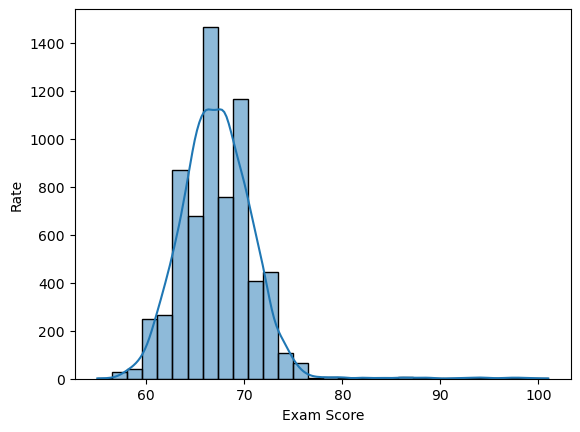

In [24]:
# Histograms to show the distribution of the data
sns.histplot(df2['Exam_Score'], bins = 30, kde = True)
plt.xlabel('Exam Score')
plt.ylabel('Rate')

Exam_Score distribution follows a normal distribution very closely, though it has a slight right skew.

## 4. <a id='toc3_'></a>[Findings](#toc0_)

### 4.1. <a id='toc3_1_'></a>[Hypothesis 1](#toc0_)
***Both study hours and attendance records have a positive correlation with exam performance.***


#### Visualization

<Axes: xlabel='Hours_Studied', ylabel='Exam_Score'>

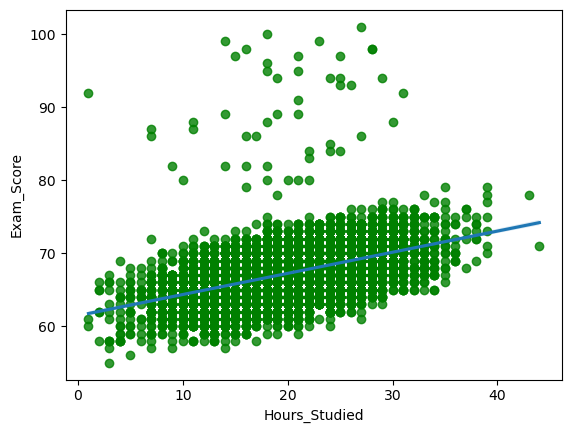

In [25]:
sns.regplot(x = "Hours_Studied", y = "Exam_Score", data=df2, scatter_kws={'color': 'green'})

There is a postive slope between Hours_Studied and Exam_Score. This indicates that as the number of hours studied increases, the exam performance also increases.

There are some outliers in the data, but they are not significant enough to affect the overall trend because the majority of the data points follow the positive slope.

****

<Axes: xlabel='Attendance', ylabel='Exam_Score'>

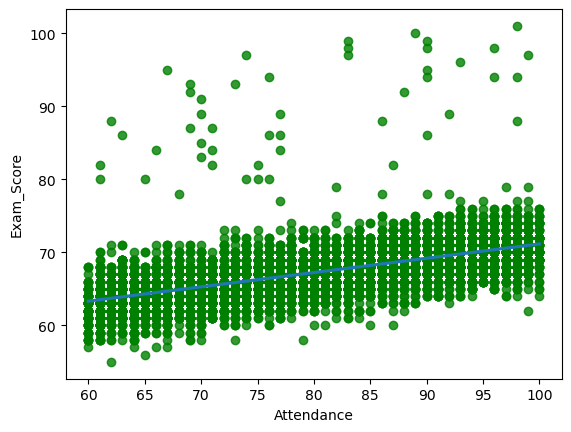

In [26]:
sns.regplot(x = "Attendance", y = "Exam_Score", data=df2, scatter_kws={'color': 'green'})

There is a positive slope between Attendance and Exam_Score. This indicates that as the number of hours studied increases, the exam performance also increases.

There are some outliers in the data, but they are not significant enough to affect the overall trend because the majority of the data points follow the positive slope.

****

While regplot focuses on one pair of variables, the pairplot allows you to visualize relationships between multiple variables simultaneously.

However, pairplots with large datasets can become cluttered. This is why we use sampling to ensure a clean and readable visualization while maintaining the overall structure of the relationships.

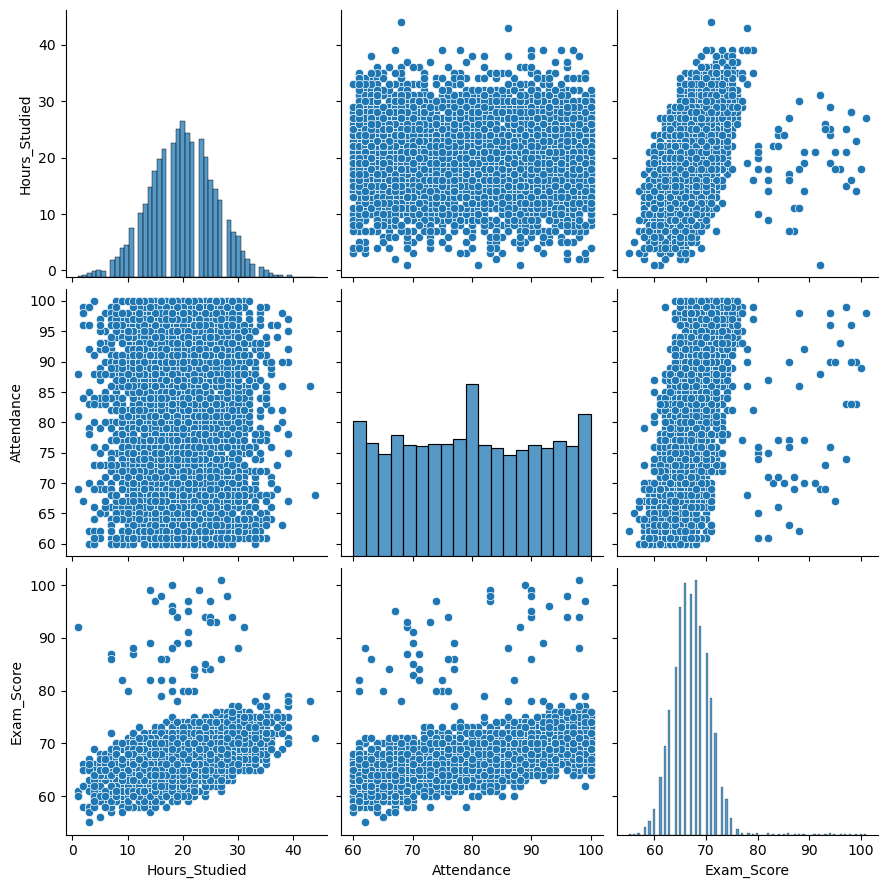

In [27]:
sample = df2.sample(frac = 0.1, random_state = 42) # We are sampling the data to make the pairplot more readable
sns.pairplot(df2[['Hours_Studied', 'Attendance', 'Exam_Score']], height = 3)

<b> Key Observations/Reinforcements: </b>
1. Attendance and Exam_Score:
    - Strongest linear relationship, consistent with the correlation (0.581).
    - Students with higher attendance generally perform better, but attendance alone does not guarantee high performance.
2. Hours_Studied and Exam_Score:
    - Moderate positive relationship, with some outliers performing poorly despite studying many hours or excelling with relatively fewer hours studied.
3. Attendance and Hours_Studied:
    - Virtually no relationship, as students with high attendance do not necessarily study more hours.

Even though the relationship between Attendance and Hours_Studied appears negligible from the correlation and scatter plot, we will do further exploration by breaking the data into groups based on attendance levels and observe study hours within these groups.

/var/folders/_d/5yqhjb990cd3t6ttrt0zks4r0000gn/T/ipykernel_57607/2840641693.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df2.groupby(attendance_bins)['Hours_Studied'].mean()


<Axes: xlabel='Attendance'>

Text(0.5, 0, 'Attendance (%)')

Text(0, 0.5, 'Average Hours Studied')

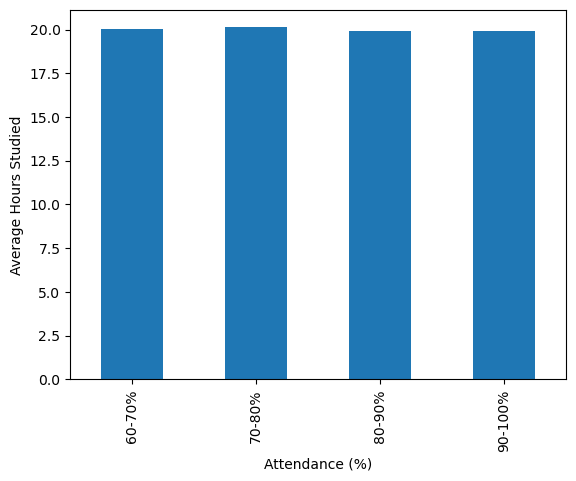

In [28]:
attendance_bins = pd.cut(df2['Attendance'], bins = [60, 70, 80, 90, 100], labels = ["60-70%", "70-80%", "80-90%", "90-100%"])
grouped = df2.groupby(attendance_bins)['Hours_Studied'].mean()

# Mean hours studied for each attendance group
grouped.plot(kind = 'bar')
plt.xlabel("Attendance (%)")
plt.ylabel("Average Hours Studied")
plt.show()

- The average hours studied appear to be roughly the same across all attendance groups (close to 20 hours).
- Attendance levels do not significantly influence study hours.
- There’s no trend (e.g., increase or decrease) in study hours as attendance improves.
- This supports the earlier observation of a very weak correlation (-0.009) between Attendance and Hours_Studied.

****

#### Single Linear Regression

In [29]:
single_linear_regression('Hours_Studied', X_scaled, y)
single_linear_regression('Attendance', X_scaled, y)

Single Linear Regression for Hours_Studied
                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     1244.
Date:                Sun, 08 Dec 2024   Prob (F-statistic):          7.88e-245
Time:                        15:51:05   Log-Likelihood:                -14163.
No. Observations:                5285   AIC:                         2.833e+04
Df Residuals:                    5283   BIC:                         2.834e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
con

Single Linear Regression for Attendance
                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     2664.
Date:                Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                        15:51:05   Log-Likelihood:                -13642.
No. Observations:                5285   AIC:                         2.729e+04
Df Residuals:                    5283   BIC:                         2.730e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

****

#### Multiple Linear Regression

In [30]:
multiple_linear_regression(['Hours_Studied', 'Attendance'], X_scaled, y)

Multiple Linear Regression for ['Hours_Studied', 'Attendance']
                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     2980.
Date:                Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                        15:51:06   Log-Likelihood:                -12725.
No. Observations:                5285   AIC:                         2.546e+04
Df Residuals:                    5282   BIC:                         2.548e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

#### 4.1.1. <a id='toc3_1_1_'></a>[Finding 1](#toc0_)

Both hours studied and student attendance are positively correlated with exam scores, and when combined, these two features explain 53% of the variance in exam scores (total R-squared 0.53).

Hours studied and attendance both have positive coefficients (1.7112 and 2.2764 respectively) meaning they are both linearly related to exam scores. They also have p-values < 0.001 which means these features are statistically significant to the resulting exam score.

<div class="alert alert-block alert-success">These results demonstrate to educators that both attendance and hours studied play a big role in affecting students' exam scores. We propose an incentive system for attendance and extra study sessions to increase the amount of hours studied.</div>

### 4.2. <a id='toc3_2_'></a>[Hypothesis 2](#toc0_)
***Lower motivation levels are associated with lower exam scores, and vice versa, higher motivation levels are positively associated with higher exam scores.***

#### Visualization

<Axes: xlabel='Motivation_Level', ylabel='Exam_Score'>

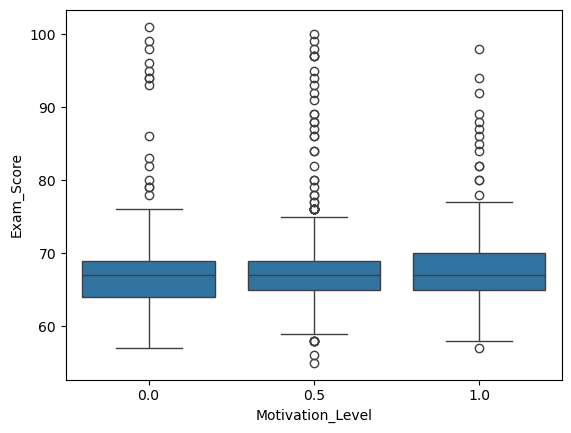

In [31]:
sns.boxplot(x = "Motivation_Level", y = "Exam_Score", data=df2)

The median (horizontal line in each box) slightly increases from Motivation_Level 0.0 to 1.0, indicating higher motivation might correspond to better exam scores. However, the presence of outliers at all levels suggests heterogeneity, which means that students with the same motivation level might have different exam scores. Hence, motivation may influence performance but isn't the sole determining factor.

After observing the slight difference, we want to check if the difference is statistically significant, so we will conduct an ANOVA test to compare the means of the groups.

<b> ANOVA Statistical Test (Analysis of Variance) </b>
- <b> Why are we using ANOVA here? What is the purpose? </b>

Even if the medians or distributions look different, it's possible the differences are just due to random noise. ANOVA can assess whether the variation in Exam_Score is larger between motivation groups than within each group (signal vs. noise).

- <b> Why are we using ANOVA here? Why not t-test? </b>

Since there are three levels of motivation (0.0, 0.5, 1.0), ANOVA is the correct test for determining whether there are differences in mean exam scores across all three groups simultaneously.

Null Hypothesis: There is no significant difference in exam scores between students with different motivation levels.

Alternative Hypothesis: There is a significant difference in exam scores between students with different motivation levels.

In [32]:
# We need to create groups based on the Motivation_Level column and then perform one-way ANOVA to determine if there is a significant difference in the mean exam scores between the groups.
group_1 = df2[df2['Motivation_Level'] == 0.0]['Exam_Score']
group_2 = df2[df2['Motivation_Level'] == 0.5]['Exam_Score']
group_3 = df2[df2['Motivation_Level'] == 1.0]['Exam_Score']

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(group_1, group_2, group_3)

print("F-statistic:", f_stat)
print("p-value:", p_value)

F-statistic: 25.716769950376058
p-value: 7.492319380241584e-12


Since the p-value is extremely small (i.e. < 0.05), we can reject the null hypothesis that the mean exam scores are the same across all three motivation levels. **This means that motivation level does have a statistically significant effect on exam scores.**

****

Motivation might also indirectly affect exam performance through its influence on Attendance or Hours_Studied. Exploring interactions and mediation effects could provide deeper insights.

The hypothesis "lower motivation levels are associated with lower exam scores" aligns naturally with the inclusion of effort-related features like Attendance or Hours_Studied:

- Students with low motivation might:
    - Attend fewer classes (lower Attendance).
    - Study less (lower Hours_Studied).
    - Perform poorly in exams (lower Exam_Score).

- Students with high motivation might:
    - Attend more classes (higher Attendance).
    - Study more (higher Hours_Studied).
    - Perform better in exams (higher Exam_Score).

**Motivation_Level & Attendance**

<Axes: xlabel='Attendance', ylabel='Exam_Score'>

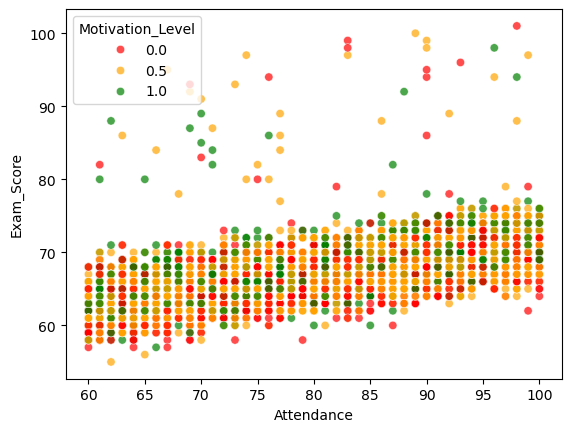

In [33]:
# Palette is used to define the colors of the points based on the Motivation_Level 
custom_palette = {0.0: "red", 0.5: "orange", 1.0: "green"}

# The hue parameter is used to color the points based on the Motivation_Level
# The graph will show the relationship between Hours_Studied and Exam_Score, with the points colored based on the Motivation_Level
sns.scatterplot(data = df2, x = "Attendance", y = "Exam_Score", hue = "Motivation_Level", palette = custom_palette, alpha = 0.7)

Once again, we see Exam_Score tends to increase with Attendance, indicating a positive correlation between attendance and exam performance.

Motivation_Level seems to be evenly distributed with regards to Exam_Score and Attendance.

We would like to more clearly observe the relationship between Motivation_Level, Attendance, and Exam_Score. We can quantify this with an lmplot which is specifically designed for visualizing linear relationships with optional grouping by a categorical variable (i.e. here, Attendance).

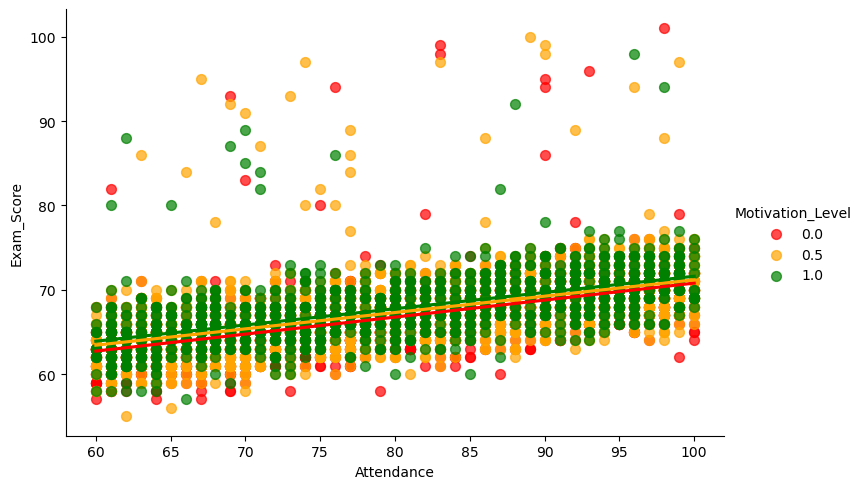

In [34]:
sns.lmplot(data = df2, x = 'Attendance', y = 'Exam_Score', hue = 'Motivation_Level', ci = None, aspect = 1.5, palette = custom_palette, scatter_kws = {'s': 50, 'alpha': 0.7})

From this graph, we can see that the y-intercept increases slightly for the regression line between Attendance and Exam_Score as Motivation_Level increases. Here, higher Motivation_Level relates to higher Exam_Score for this range of Attendance values. **This indicates that higher Motivation_Level may compound the effect of Attendance on Exam_Score.**

However, all three motivation levels (0.0, 0.5, 1.0) still overlap significantly, meaning students with lower motivation (red, 0.0) can still achieve high scores, and highly motivated students (green, 1.0) can occasionally score lower.

**Motivation_Level & Hours_Studied**

We know that Hours_Studied and Attendance do not have a meaningful correlation. Therefore, it won't be surprising if the lmplot shows a similar pattern for Hours_Studied (i.e., if it is added as another predictor).

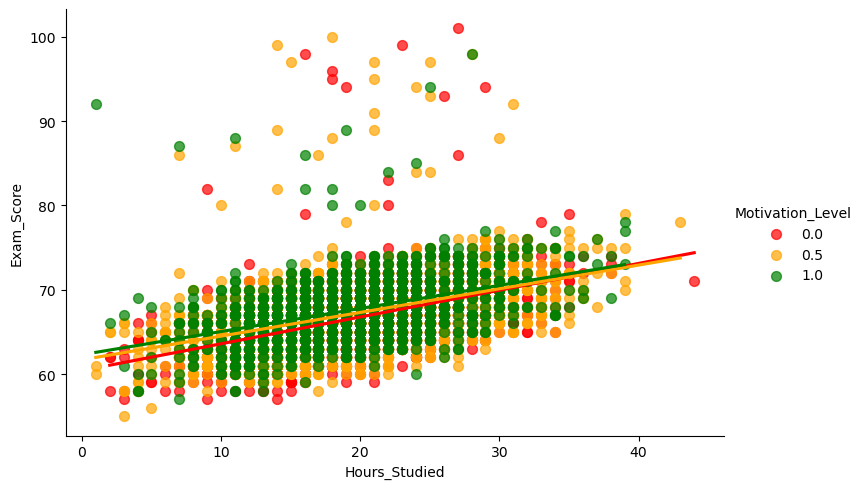

In [35]:
sns.lmplot(data = df2, x = 'Hours_Studied', y = 'Exam_Score', hue = 'Motivation_Level', ci = None, aspect = 1.5, palette = custom_palette, scatter_kws = {'s': 50, 'alpha': 0.7})

Again, there is a slightly higher y-intercept for the regression line between Hours_Studied and Exam_Score for higher Motivation_Level. Here, higher Motivation_Level relates to higher Exam_Score at the values for Hours_Studied in which all motivation levels are present. **This indicates that higher Motivation_Level may compound the effect of Hours_Studied on Exam_Score.**

****

#### Single Linear Regression

In [36]:
single_linear_regression('Motivation_Level', X_scaled, y)

Single Linear Regression for Motivation_Level
                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     30.60
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           3.33e-08
Time:                        15:51:06   Log-Likelihood:                -14706.
No. Observations:                5285   AIC:                         2.942e+04
Df Residuals:                    5283   BIC:                         2.943e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

****

#### Multiple Linear Regression

In [37]:
multiple_linear_regression(['Motivation_Level'], X_scaled, y)

Multiple Linear Regression for ['Motivation_Level']
                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     30.60
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           3.33e-08
Time:                        15:51:06   Log-Likelihood:                -14706.
No. Observations:                5285   AIC:                         2.942e+04
Df Residuals:                    5283   BIC:                         2.943e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

#### 4.2.1. <a id='toc3_2_1_'></a>[Finding 2](#toc0_)

Motivation level has an R-squared value of 0.006 signifying a weak positive correlation with exam scores.

Motivation level has a positive coefficient of 0.298, which means that the feature is linearly related to exam scores. As such, this also means that a decrease in motivation levels will lead to a decrease in student performance. It also has a p-value < 0.001 meaning that it is statistically significant. However, the overall relationship between motivation level and student exam scores is weak.

<div class="alert alert-block alert-success">Due to motivation level being a weak predictor of students' exam performance, we suggest that educators focus more on impactful factors such as attendance and study habits. However, its positive relationship as well as potential compounding effects on exam score when combined with attendance and hours studied means that motivation should still be leveraged. This could be done through creating more engaging lectures and teaching students about topics in a way that is relevant to their lives.</div>

### 4.3. <a id='toc3_3_'></a>[Hypothesis 3](#toc0_)
***High parental involvement and positive peer influence positively impact student performance in exams.***

#### Visualization

<b> Relationship Between Parental Involvement and Exam Score </b>

<Axes: xlabel='Parental_Involvement', ylabel='Exam_Score'>

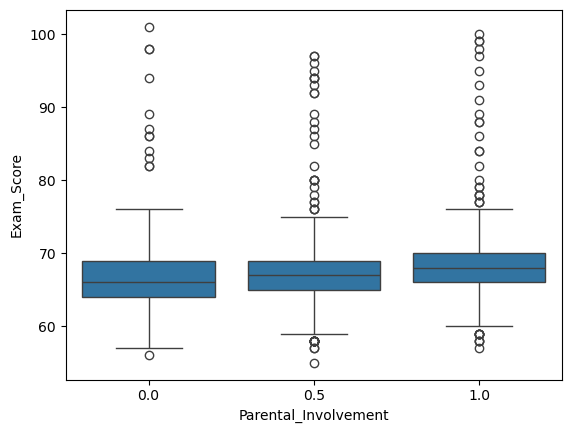

In [38]:
sns.boxplot(x = "Parental_Involvement", y = "Exam_Score", data=df2)

The boxplot shows that students with higher parental involvement (1.0) tend to have slightly higher exam scores compared to those with no or partial involvement. The overlap in score distributions, however, suggests that the correlation, if present, may not be strong.

After observing the slight difference, we want to check if the difference is statistically significant, so we will conduct an ANOVA test to compare the means of the groups.

<b> ANOVA Statistical Test (Analysis of Variance) </b>

Null Hypothesis: There is no significant difference in exam scores between students with different levels of parental involvement.

Alternative Hypothesis: There is a significant difference in exam scores between students with different levels of parental involvement.

In [39]:
# We need to create groups based on the Parental_Involvement column and then perform one-way ANOVA to determine if there is a significant difference in the mean exam scores between the groups.
group_1 = df2[df2['Parental_Involvement'] == 0.0]['Exam_Score']
group_2 = df2[df2['Parental_Involvement'] == 0.5]['Exam_Score']
group_3 = df2[df2['Parental_Involvement'] == 1.0]['Exam_Score']

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(group_1, group_2, group_3)

print("F-statistic:", f_stat)
print("p-value:", p_value)

F-statistic: 84.48765484606227
p-value: 5.875479153325193e-37


Since the p-value is significantly less than 0.05, we can reject the null hypothesis. **This means that parental involvement likely has an effect on student performance.**

****

<b> Relationship Between Peer Influence and Exam Performance </b>

<Axes: xlabel='Peer_Influence', ylabel='Exam_Score'>

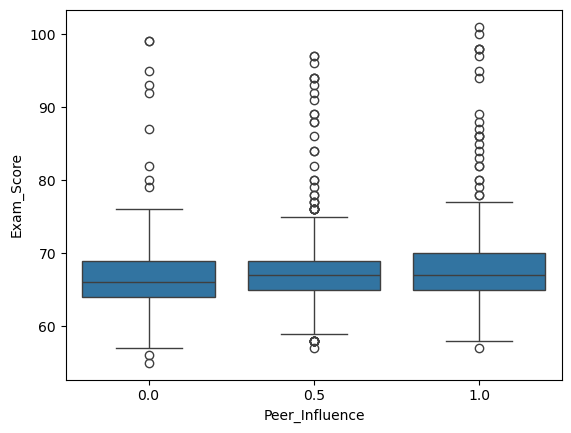

In [40]:
sns.boxplot(x = "Peer_Influence", y = "Exam_Score", data = df2)

There is a slight increase in the median and distribution of Exam_Score across Peer_Influence levels. 

After observing the slight difference, we want to check if the difference is statistically significant, so we will conduct an ANOVA test to compare the means of the groups.

<b> ANOVA Statistical Test (Analysis of Variance) </b>

Null Hypothesis: There is no significant difference in exam scores between students with different types of peer influence.

Alternative Hypothesis: There is a significant difference in exam scores between students with different types of peer influence.

In [41]:
# We need to create groups based on the Peer_Influence column and then perform one-way ANOVA to determine if there is a significant difference in the mean exam scores between the groups.
group_1 = df2[df2['Peer_Influence'] == 0.0]['Exam_Score']
group_2 = df2[df2['Peer_Influence'] == 0.5]['Exam_Score']
group_3 = df2[df2['Peer_Influence'] == 1.0]['Exam_Score']

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(group_1, group_2, group_3)

print("F-statistic:", f_stat)
print("p-value:", p_value)

F-statistic: 34.05207650712709
p-value: 1.936890927098569e-15


Since the p-value is significantly less than 0.05, we can reject the null hypothesis. This means that the type of peer influence likely has an effect on student performance.

****

#### Single Linear Regression

In [42]:
single_linear_regression('Parental_Involvement', X_scaled, y)
single_linear_regression('Peer_Influence', X_scaled, y)

Single Linear Regression for Parental_Involvement
                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     129.5
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           1.18e-29
Time:                        15:51:07   Log-Likelihood:                -14657.
No. Observations:                5285   AIC:                         2.932e+04
Df Residuals:                    5283   BIC:                         2.933e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

Single Linear Regression for Peer_Influence
                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     49.54
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           2.19e-12
Time:                        15:51:07   Log-Likelihood:                -14697.
No. Observations:                5285   AIC:                         2.940e+04
Df Residuals:                    5283   BIC:                         2.941e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------


#### Multiple Linear Regression

In [43]:
multiple_linear_regression(['Parental_Involvement', 'Peer_Influence'], X_scaled, y)

Multiple Linear Regression for ['Parental_Involvement', 'Peer_Influence']
                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     88.78
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           1.19e-38
Time:                        15:51:07   Log-Likelihood:                -14634.
No. Observations:                5285   AIC:                         2.927e+04
Df Residuals:                    5282   BIC:                         2.929e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

#### 4.3.1. <a id='toc3_3_1_'></a>[Finding 3](#toc0_)

Parental involvement and peer influence are both positively associated with exam scores, and these two features explain roughly 3.3% of the variance in exam performance (total R-squared 0.033).

Although this relationship is weaker than that of attendance and hours studied, these two features are stronger predictors than motivation level, thus, high parental involvement and positive peer influence can positively impact student performance in exams. Both of these features have a p-value < 0.001 meaning that they are statistically significant. In addition, they have coefficients of 0.6066 and 0.3760) respectively. Since both coefficients are positive, this suggests a linear relationship between parental involvement vs. exam scores and peer influence vs. exam scores.

<div class="alert alert-block alert-success">We propose educators set up quarterly parent-teacher conference meetings to discuss the importance of parents being involved in their students' lives. In addition, fostering a welcoming and respectful environment, and organizing peer mentorship programs is a great way to boost peer influence.</div>

### 4.4. <a id='toc3_4_'></a>[Feature Importances](#toc0_)

Beyond our analysis of the relationships between specific variables and exam scores, we wanted to create a more comprehensive view of the importance of each input feature in the model's decision-making process when predicting exam scores. We will employ various methods to do this.

#### 4.4.1. <a id='toc3_4_1_'></a>[Scaling input variables](#toc0_)
This will ensure that features with different ranges of values do not disproportionately influence the model's predicitions.

In [44]:
# Fit and transform the data
scaled_data = scaler.fit_transform(df2.drop(columns='Exam_Score'))

# Convert the scaled data back to a DataFrame
scaled_df2 = pd.DataFrame(scaled_data, columns=df2.drop(columns='Exam_Score').columns)

# Add the target variable back to the scaled DataFrame
scaled_df2['Exam_Score'] = df2['Exam_Score'].values

scaled_df2.head()

,Hours_Studied,Attendance,Parental_Involvement,Extracurricular_Activities,Sleep_Hours,Motivation_Level,Family_Income,Peer_Influence,Gender,Exam_Score
0,0.504942,0.348375,-1.562146,-1.214685,-0.019796,-1.302866,-1.060721,1.070550,0.855746,67
1,-0.162822,-1.383736,-1.562146,-1.214685,0.661399,-1.302866,0.285971,-1.575587,-1.168570,61
2,0.671882,1.560853,-0.124267,0.823259,-0.019796,0.134442,0.285971,-0.252518,0.855746,74
3,1.506587,0.781403,-1.562146,0.823259,0.661399,0.134442,0.285971,-1.575587,0.855746,71
4,-0.162822,1.041220,-0.124267,0.823259,-0.700990,0.134442,0.285971,-0.252518,-1.168570,70


#### 4.4.2. <a id='toc3_4_2_'></a>[<font color = green>***Random Forest***</font>](#toc0_)
Random forest description

However, it is important to note that this impurity-based feature importance can inflate the importance of numerical features.

RandomForestRegressor(random_state=42)

,Feature,Importance
1,Attendance,0.424139
0,Hours_Studied,0.286563
4,Sleep_Hours,0.065404
2,Parental_Involvement,0.053434
6,Family_Income,0.043278
5,Motivation_Level,0.041334
7,Peer_Influence,0.039990
3,Extracurricular_Activities,0.025296
8,Gender,0.020561


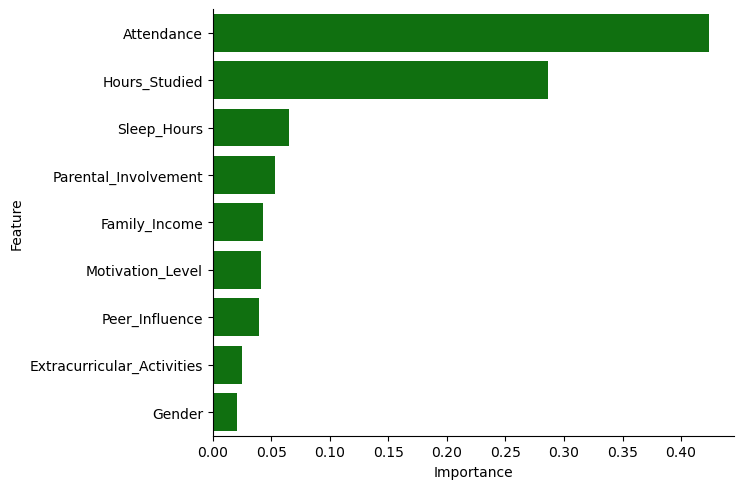

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = scaled_df2.drop(columns='Exam_Score')
y = scaled_df2['Exam_Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the RandomForestRegressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances_regressor = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importances_regressor = pd.DataFrame({'Feature': X.columns, 'Importance': importances_regressor})
feature_importances_regressor.sort_values(by='Importance', ascending=False, inplace=True)
feature_importances_regressor

# Plot the feature importances
sns.catplot(x='Importance', y='Feature', data=feature_importances_regressor, kind='bar', height=5, aspect=1.5, color='green')

#### 4.4.3. <a id='toc3_4_3_'></a>[<font color = purple>***Permutation***</font>](#toc0_)
Permutation description

,Feature,Importance
1,Attendance,0.772669
0,Hours_Studied,0.481188
2,Parental_Involvement,0.071616
6,Family_Income,0.028155
5,Motivation_Level,0.017769
3,Extracurricular_Activities,0.012504
7,Peer_Influence,0.007553
4,Sleep_Hours,0.007483
8,Gender,-0.006695


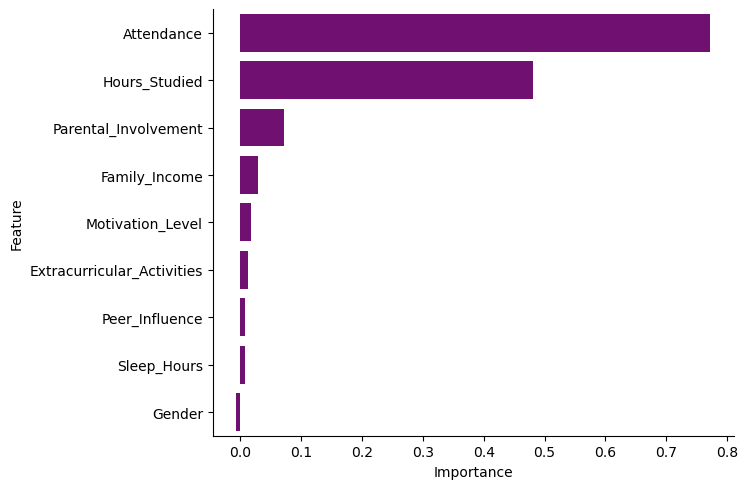

In [46]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
result_scaled = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=1)

# Create a DataFrame for better visualization
forest_importances_permutation = pd.DataFrame({'Feature': X.columns, 'Importance': result_scaled.importances_mean})
forest_importances_permutation.sort_values(by='Importance', ascending=False, inplace=True)
forest_importances_permutation

# Plot the feature importances
sns.catplot(x='Importance', y='Feature', data=forest_importances_permutation, kind='bar', height=5, aspect=1.5, color='purple')

#### 4.4.4. <a id='toc3_4_4_'></a>[<font color = orange>***Lasso Regression***</font>](#toc0_)
Lasso regression description

,Importance
Attendance,2.189560
Hours_Studied,1.664611
Parental_Involvement,0.558998
Family_Income,0.281625
Motivation_Level,0.273168
Peer_Influence,0.272071
Extracurricular_Activities,0.173226
Sleep_Hours,-0.000000
Gender,-0.000000


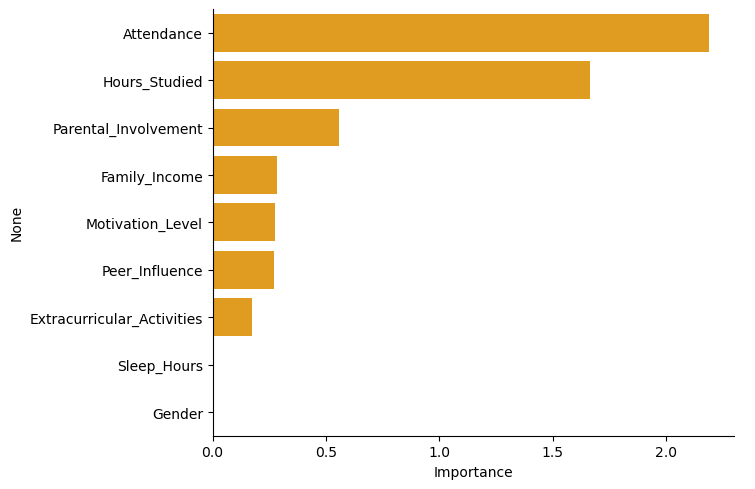

In [47]:
from sklearn.linear_model import Lasso

# Fit the Lasso model
X = scaled_df2.drop(columns = 'Exam_Score').values
y = df2['Exam_Score'].values
names = df2.drop(columns = 'Exam_Score', axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

# Create a DataFrame for better visualization
input_var = scaled_df2.drop(columns = 'Exam_Score')
dict = {}
index=0
for column in input_var:
    dict[column] = lasso_coef[index]
    index+=1

feat_coefs = pd.DataFrame.from_dict(dict, orient='index', columns=['Importance'])
feat_coefs.sort_values(by='Importance', ascending=False, inplace=True)
feat_coefs

# Plot the feature importances
sns.catplot(x='Importance', y=feat_coefs.index, data=feat_coefs, kind='bar', height=5, color = 'orange', aspect=1.5)

#### 4.4.5. <a id='toc3_4_5_'></a>[Findings](#toc0_)

Attendance and Hours_Studied were calculated as the two most important features, respectively, in each model. With the exception of the prominence of Sleep_Hours in the Random Forest Regressor, the order of each feature's importance to the model was also largely consistent among the three methods.

<div class="alert alert-block alert-success">These feature importance calculations further substantiate our previous findings regarding the effects of attendance, hours studied, and even parental involvement on exam scores, so our prior recommendations to educators remain the same.</div>